In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [192]:
df = pd.read_pickle("../../datasets/processed/laptop_price.pkl")

In [193]:
df.head()

,company,typename,inches,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg,price_euros
0,Apple,Ultrabook,13.3,2560,1600,Intel,2.3,Intel,8,128,ssd,0,0,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440,900,Intel,1.8,Intel,8,128,flash storage,0,0,macOS,1.34,898.94
2,HP,Notebook,15.6,1920,1080,Intel,2.5,Intel,8,256,ssd,0,0,Outros,1.86,575.00
3,Apple,Ultrabook,15.4,2880,1800,Intel,2.7,AMD,16,512,ssd,0,0,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560,1600,Intel,3.1,Intel,8,256,ssd,0,0,macOS,1.37,1803.60


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   company           1302 non-null   category
 1   typename          1302 non-null   category
 2   inches            1302 non-null   float32 
 3   x_screen          1302 non-null   int16   
 4   y_screen          1302 non-null   int16   
 5   cpu_manufacturer  1302 non-null   category
 6   cpu_ghz           1302 non-null   float32 
 7   gpu_manufacturer  1302 non-null   category
 8   ram_gb            1302 non-null   uint8   
 9   memory_0_gb       1302 non-null   int16   
 10  memory_0_type     1302 non-null   category
 11  memory_1_gb       1302 non-null   int16   
 12  memory_1_type     1302 non-null   category
 13  opsys             1302 non-null   category
 14  weight_kg         1302 non-null   float32 
 15  price_euros       1302 non-null   float64 
dtypes: category(7), float32(

In [195]:
df.describe()

,inches,x_screen,y_screen,cpu_ghz,ram_gb,memory_0_gb,memory_1_gb,weight_kg,price_euros
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,15.019279,1894.396313,1070.423963,2.299001,8.385561,442.930876,168.417819,2.039416,1124.043894
std,1.424860,494.632661,284.250096,0.506467,5.085166,356.180662,402.746234,0.665274,699.158856
min,10.100000,1366.000000,768.000000,0.900000,2.000000,8.000000,0.000000,0.690000,174.000000
25%,14.000000,1600.000000,900.000000,2.000000,4.000000,256.000000,0.000000,1.500000,599.000000
50%,15.600000,1920.000000,1080.000000,2.500000,8.000000,256.000000,0.000000,2.040000,978.000000
75%,15.600000,1920.000000,1080.000000,2.700000,8.000000,512.000000,0.000000,2.300000,1488.435000
max,18.400000,3840.000000,2160.000000,3.600000,64.000000,2000.000000,2000.000000,4.700000,6099.000000


In [196]:
df.describe(exclude=['float32', 'float64', 'int16', 'uint8'])

,company,typename,cpu_manufacturer,gpu_manufacturer,memory_0_type,memory_1_type,opsys
count,1302,1302,1302,1302,1302,1302,1302
unique,19,6,2,3,4,4,4
top,Dell,Notebook,Intel,Intel,ssd,0,Windows
freq,297,727,1240,722,843,1094,1125


In [197]:
df.sort_values(by=['price_euros'], ascending=False).head()

,company,typename,inches,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg,price_euros
196,Razer,Gaming,17.299999,3840,2160,Intel,2.9,Nvidia,32,1000,ssd,0,0,Windows,3.49,6099.0
830,Razer,Gaming,17.299999,3840,2160,Intel,2.9,Nvidia,32,512,ssd,0,0,Windows,3.49,5499.0
610,Lenovo,Notebook,15.600000,3840,2160,Intel,3.1,Nvidia,32,1000,ssd,0,0,Windows,2.50,4899.0
749,HP,Workstation,17.299999,1920,1080,Intel,2.9,Nvidia,16,256,ssd,0,0,Windows,3.00,4389.0
1066,Asus,Gaming,17.299999,1920,1080,Intel,2.7,Nvidia,64,1000,ssd,0,0,Windows,3.58,3975.0


In [198]:
df.groupby(by=["company"])['price_euros'].mean('price_euros')

company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1507.750000
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: price_euros, dtype: float64

In [199]:
def bar_plt(df, column, ax, title=''):
    sns.histplot(data=df, x=column, ax=ax)
    ax.tick_params(axis='x', labelrotation=90)
    if title != '':
        ax.set_xlabel(title.capitalize())
    else:
        ax.set_xlabel(column.capitalize())
    ax.set_ylabel('')

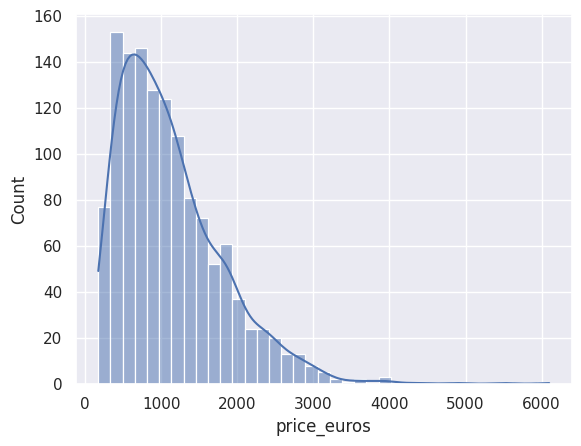

In [215]:
sns.histplot(df['price_euros'], kde=True)
plt.show()

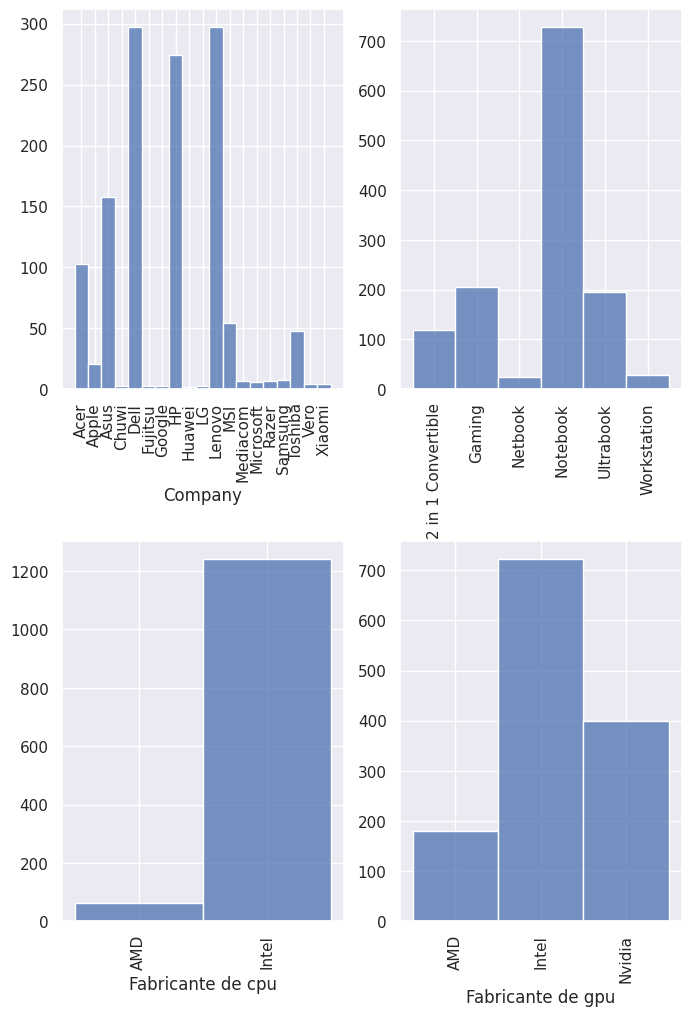

In [200]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
bar_plt(df, 'company', ax[0][0])
bar_plt(df, 'typename', ax[0][1])
bar_plt(df, 'cpu_manufacturer', ax[1][0], 'Fabricante de CPU')
bar_plt(df, 'gpu_manufacturer', ax[1][1], 'Fabricante de GPU')
plt.subplots_adjust(hspace=0.4, top=1.25)
plt.show()

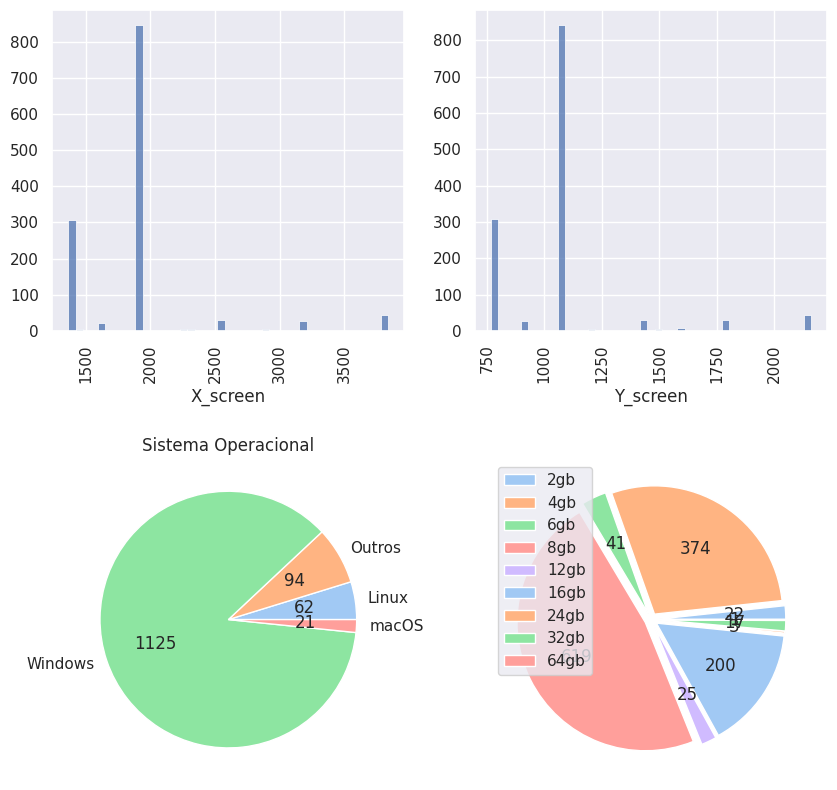

In [201]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
bar_plt(df, 'x_screen', ax[0][0])
bar_plt(df, 'y_screen', ax[0][1])

a = df.groupby(by=["opsys"]).count().iloc[:, 1]
labels = a.index
explode = [ 0.05 for _ in list(a.index)]
ax[1][0].pie(a.values, labels=labels, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
ax[1][0].set_title('Sistema Operacional')

a = df.groupby(by=["ram_gb"]).count().iloc[:, 1]
labels = [ (str(item) + 'gb') for item in list(a.index)]
explode = [ 0.05 for _ in list(a.index)]
ax[1][1] = plt.pie(a.values, explode=explode, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
plt.legend(labels)
plt.subplots_adjust(hspace=0.4)
plt.show()

In [202]:
df.memory_0_type.unique()

['ssd', 'flash storage', 'hdd', 'hybrid']
Categories (4, object): ['flash storage', 'hdd', 'hybrid', 'ssd']

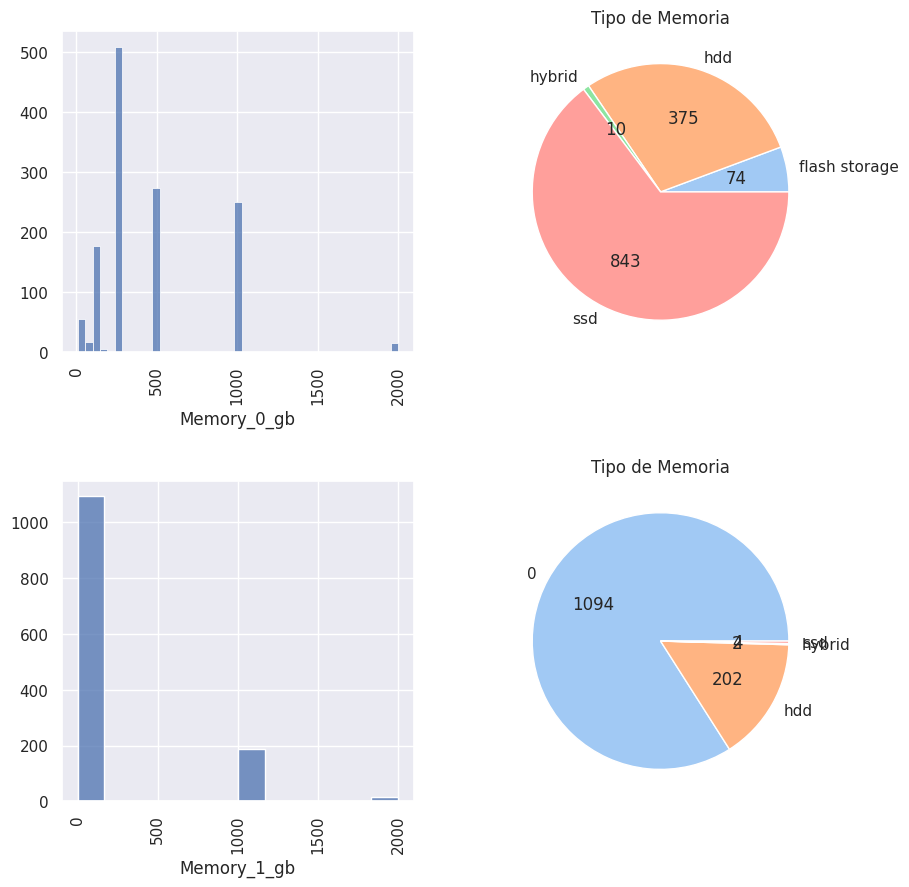

In [203]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

bar_plt(df, 'memory_0_gb', ax[0][0])
a = df.groupby(by=["memory_0_type"]).count().iloc[:, 1]
labels = a.index
explode = [ 0.05 for _ in list(a.index)]
ax[0][1].pie(a.values, labels=labels, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
ax[0][1].set_title('Tipo de Memoria')

bar_plt(df, 'memory_1_gb', ax[1][0])
a = df.groupby(by=["memory_1_type"]).count().iloc[:, 1]
labels = a.index
explode = [ 0.05 for _ in list(a.index)]
ax[1][1].pie(a.values, labels=labels, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
ax[1][1].set_title('Tipo de Memoria')

plt.subplots_adjust(hspace=0.4)
plt.show()

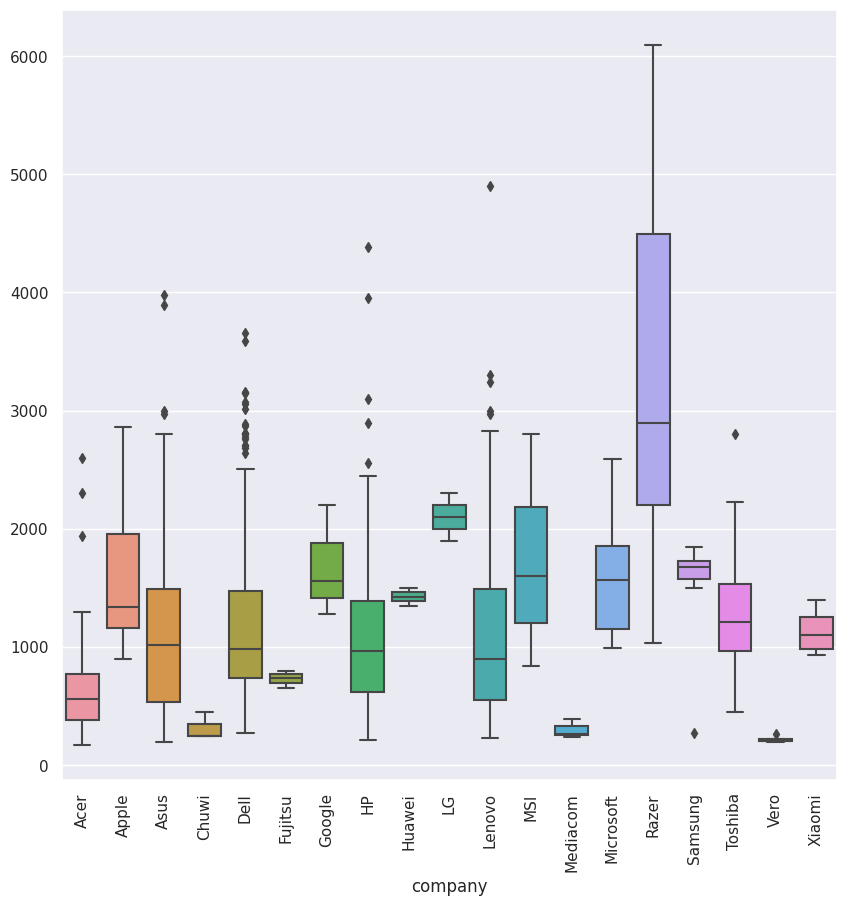

In [205]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x="company", y="price_euros")
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

[]

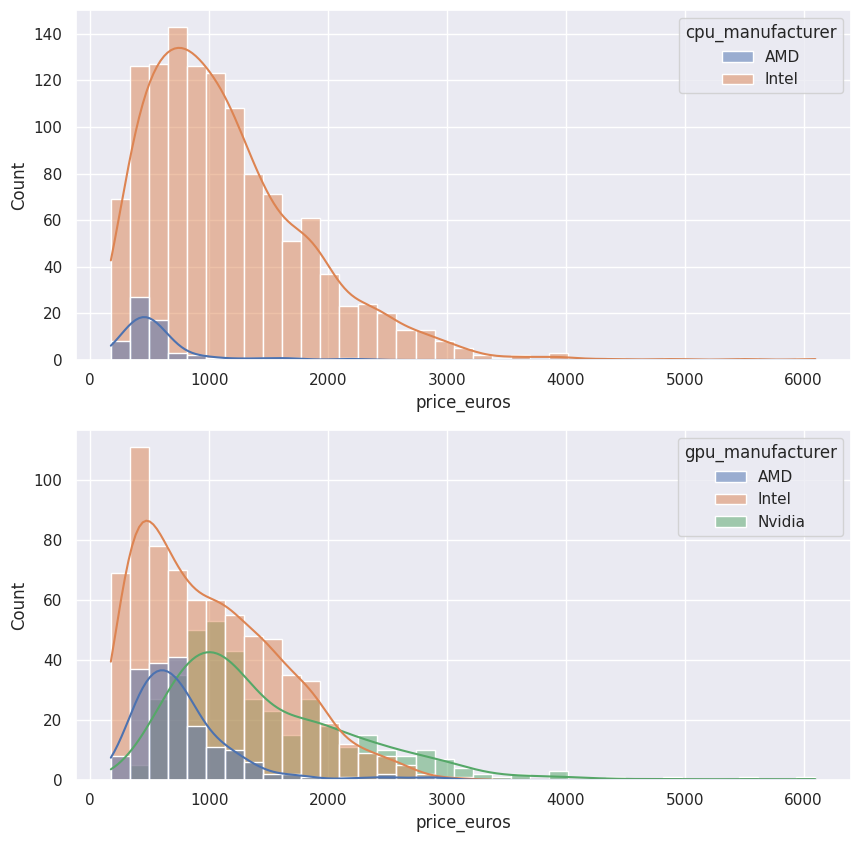

In [207]:
fig, ax = plt.subplots(2, figsize=(10, 10))
valores = {'cpu_manufacturer': ax[0], 'gpu_manufacturer': ax[1]}
for item, ax in valores.items():
    sns.histplot(data=df, x='price_euros', hue=item, ax=ax, kde=True)
plt.plot()

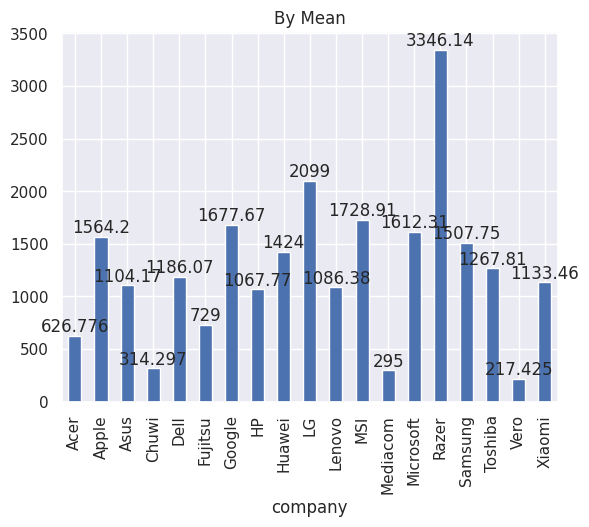

In [210]:
ax = df.groupby(by='company')['price_euros'].mean().plot.bar(rot=90)
for value in ax.containers:
    ax.bar_label(value)
ax.set_title('By Mean')
plt.show()

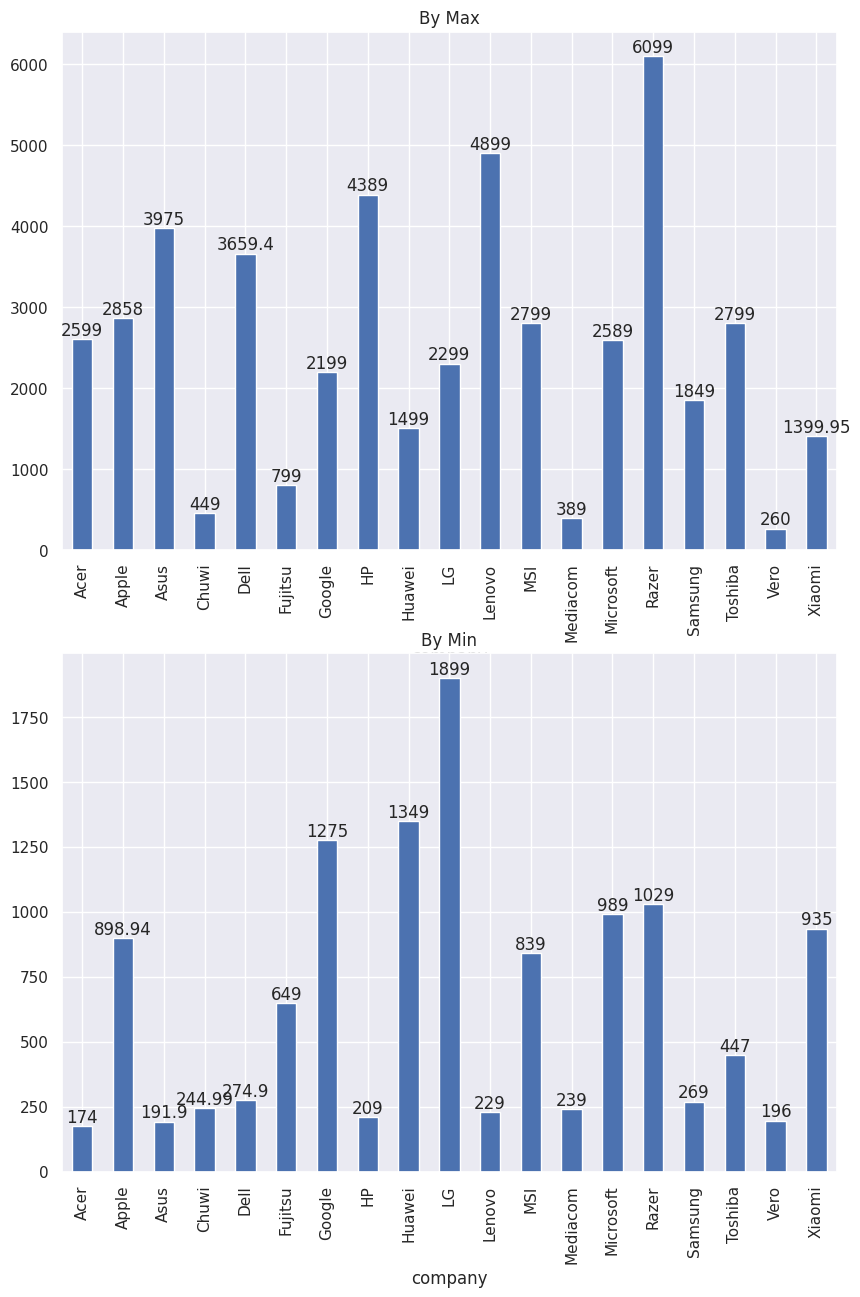

In [211]:
fig, ax = plt.subplots(2, figsize=(10, 10))

items = {
    'max': ax[0],
    'min': ax[1]
}

for item, ax in items.items():
    df.groupby(by='company')['price_euros'].agg(f'{item}').plot.bar(rot=90, ax=ax)
    for value in ax.containers:
        ax.bar_label(value)
    ax.set_title(f'By {item.capitalize()}')    

plt.subplots_adjust(top=1.25)
plt.show()

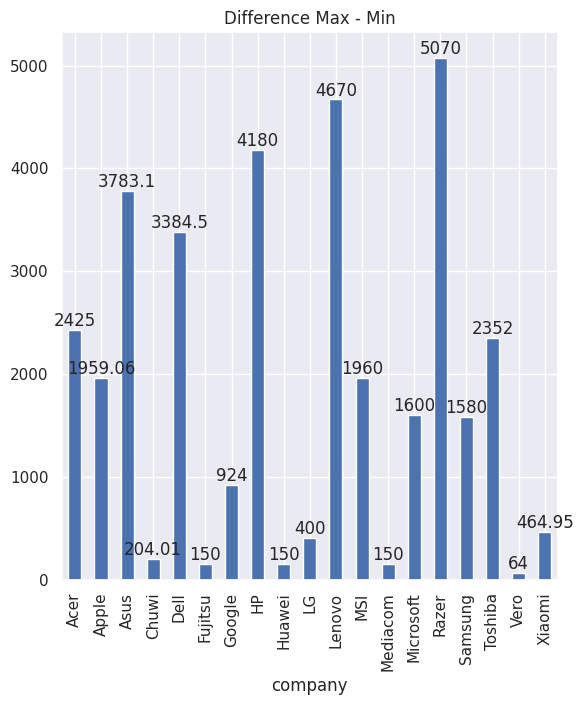

In [213]:
ax = (df.groupby(by='company')['price_euros'].agg('max') - df.groupby(by='company')['price_euros'].agg('min')).plot.bar(rot=90)
for value in ax.containers:
    ax.bar_label(value)
ax.set_title(f'Difference Max - Min')    

plt.subplots_adjust(top=1.25)
plt.show()

## Correlações

In [236]:
table = pd.pivot_table(df, values=['memory_0_gb', 'memory_1_gb'], index='company', aggfunc = np.mean)

In [237]:
table

,memory_0_gb,memory_1_gb
company,,
Acer,476.854369,58.252427
Apple,323.047619,0.000000
Asus,427.848101,349.797468
Chuwi,64.000000,0.000000
Dell,480.659933,200.377104
Fujitsu,504.000000,0.000000
Google,298.666667,0.000000
HP,474.321168,52.919708
Huawei,384.000000,0.000000


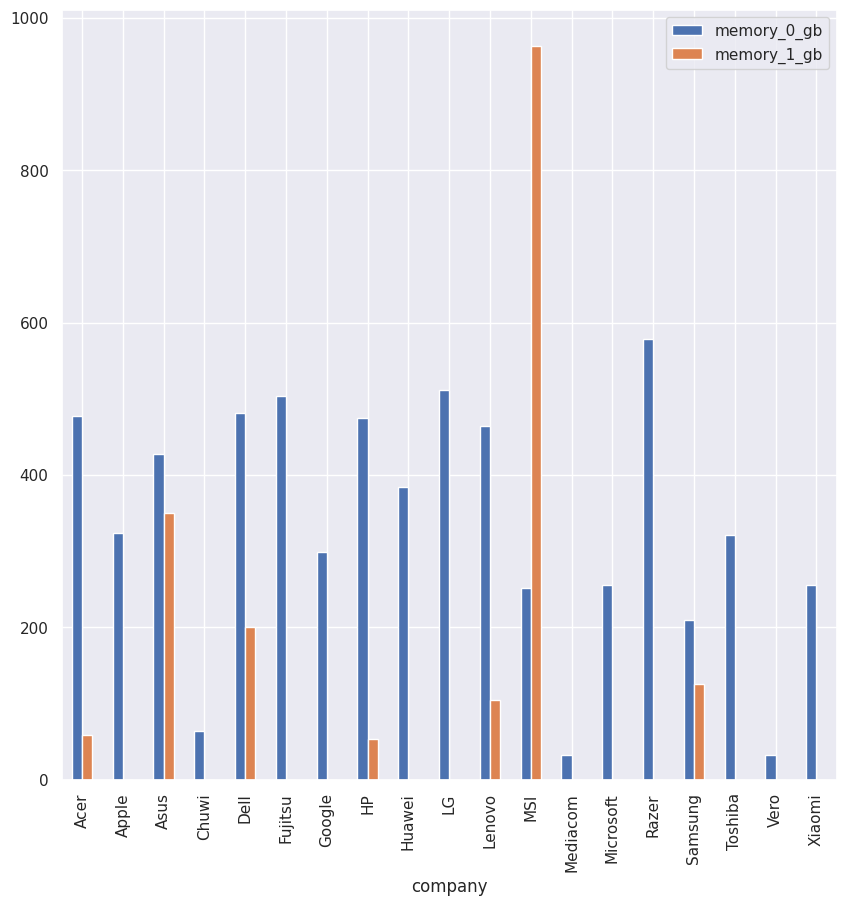

In [246]:
table.plot.bar(figsize=(10,10))
plt.show()